# **Задание**

* Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + -регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
* Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат.
* Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
* Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
* При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
* Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.
* При обучении моделей использовать масштабирование данных.
* Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE * Обучить модель, используя существующую библиотеку. Например, в sklearn для -регуляризатора можно использовать Ridge. Сравнить качество с вашей реализацией.
* Повторить тоже самое, но используя кросс-валидацию.
* Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.
* (+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).
* (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.
* (+2 балла) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.
* (+2 балла) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

In [1]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import inf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_regression, RFECV, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## **Первичный анализ, очистка и подготовка данных**

В работе используется [датасет](https://www.kaggle.com/uciml/student-alcohol-consumption) с социальной, учебной и общей информации об учениках средней школы. По ссылке можно увидеть, что в данном датасете есть две выборки: ученики на курсе Математики и Португальского языка. Исследование проводилось на первой выборке. В датасете присутствуют следующие переменные:


*   school - школа ученика 
*   sex - пол ученика 
*   age - возраст
*   address - тип жилья ученика (сельская местность или городская)
*   famsize - размер семьи
*   Pstatus - статус отношений родителей (живут вместе - T, или раздельно - A)
*   Medu - образование матери
*   Fedu - образование отца
*   Mjob - работа матери
*   Fjob - работа отца
*   reason - причина выбора этой школы
*   guardian - опекун ученика
*   traveltime - время, затраченное за поездку в школу
*   studytime - количество часов занятий в неделю
*   failures - количество проваленных предметов в прошлом
*   schoolsup - дополнительная поддержка в школе
*   famsup - дополнительная поддержка дома
*   paid - дополнительные занятия по предмету (Математике)
*   activities - занятия вне школы
*   nursery - посещал(а) ли детский сад
*   higher - хочет ли продолжить обучение в высшем учебном заведении
*   internet - доступ к интернету дома
*   romantic - состоит в романтических отношениях
*   famrel - качество отношений в семье
*   freetime - колчество свободного времени в неделю
*   goout - количество раз, проводимых с друзьями в неделю
*   Dalc - потребление алкоголя в будние дни
*   Walc - потребление алкоголя в выходные дни
*   health - статус здоровья
*   absences - количество прогулов
*   G1 - оценка по математике за первое полугодие
*   G2 - оценка по математике за 2 полугодие
*   G3 - итоговая оценка


In [3]:
df = pd.read_csv("student-mat.csv")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Из таблицы видно, что интересующая нас часть данных целая и не имеет пропусков, поэтому шаг с удалением пустых данных можно пропустить. Посмотрим на статистику по целевому признаку

In [5]:
df['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

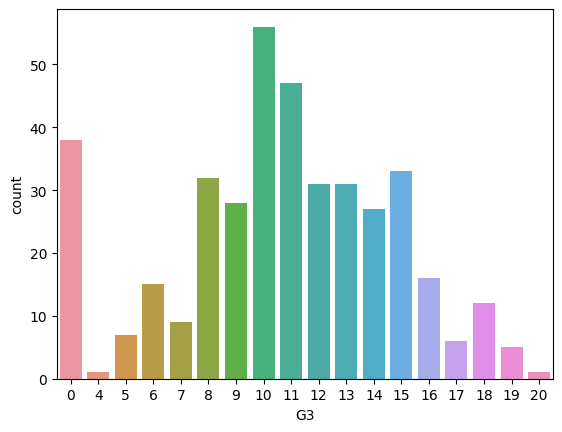

In [6]:
sns.countplot(x = 'G3', data=df);

Из таблицы и графика видно, что 10 - самая часто встречающаяся отметка среди учеников. Теперь посмотрим на зависимости между целевым признаком от нецелевых.

## **Выбор самых подходящих признаков**


/tmp/ipykernel_59762/3026390808.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


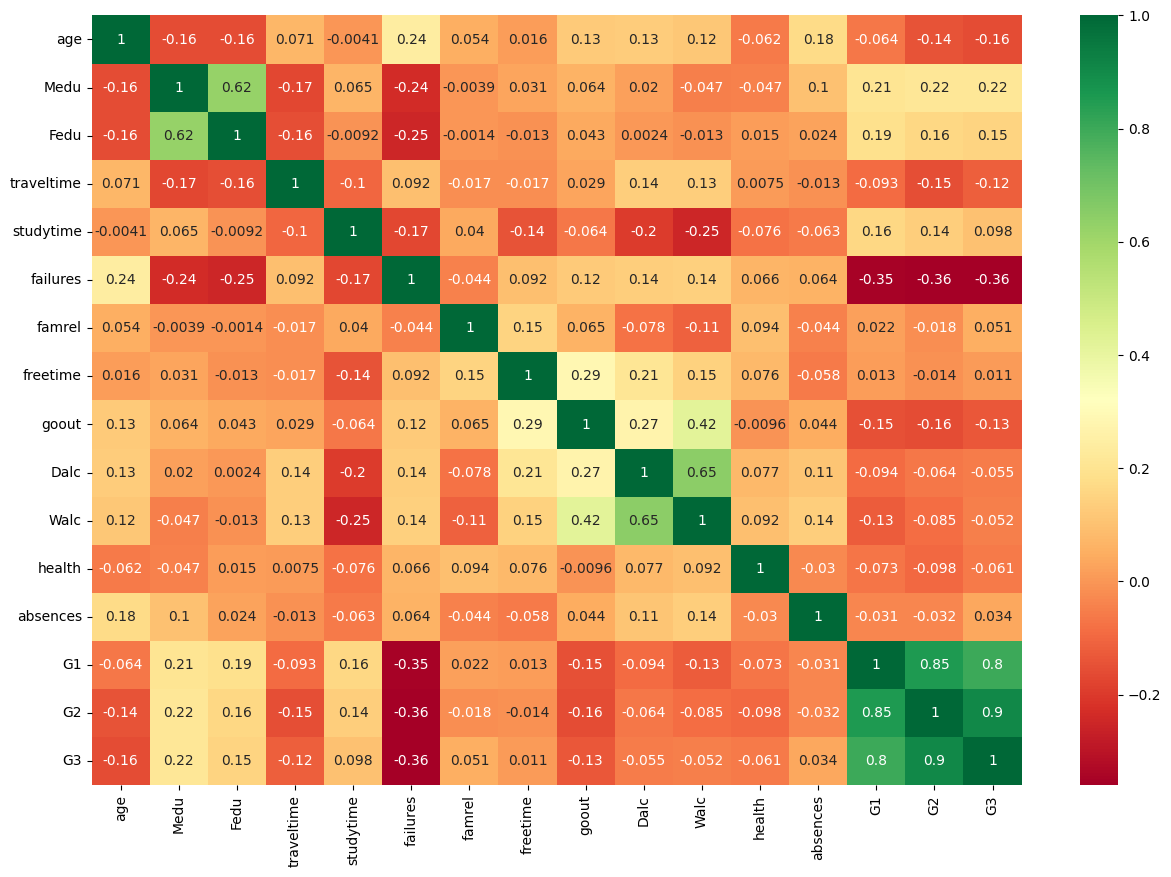

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Сначала посмотрим на корреляцию между количественными признаками. Между признаками **G1** и **G2** (и целевым **G3**) заметна сильная корреляция. Можем убрать один из них, чтобы не нести ибыточную информацию.

In [8]:
df = df.drop(columns = "G2")

Трансформируем категориальные признаки в количественные, чтобы найти наилучшее количество признаков для обучения моделей

In [9]:
df['Fjob'].replace(['other', 'services', 'teacher', 'at_home', 'health'], [0, 1, 2, 3, 4], inplace=True)
df['Mjob'].replace(['other', 'services', 'teacher', 'at_home', 'health'], [0, 1, 2, 3, 4], inplace=True)
df['reason'].replace(['course', 'home', 'reputation', 'other'], [0, 1, 2, 3], inplace=True)
df['guardian'].replace(['other', 'mother', 'father'], [0, 1, 2], inplace=True)


In [10]:
df = pd.get_dummies(df, columns = ["Pstatus", "higher", "sex", "address", "famsize", "schoolsup", "school", "famsup", "activities", "nursery", "internet", "romantic", "paid"],
                         drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             395 non-null    int64
 1   Medu            395 non-null    int64
 2   Fedu            395 non-null    int64
 3   Mjob            395 non-null    int64
 4   Fjob            395 non-null    int64
 5   reason          395 non-null    int64
 6   guardian        395 non-null    int64
 7   traveltime      395 non-null    int64
 8   studytime       395 non-null    int64
 9   failures        395 non-null    int64
 10  famrel          395 non-null    int64
 11  freetime        395 non-null    int64
 12  goout           395 non-null    int64
 13  Dalc            395 non-null    int64
 14  Walc            395 non-null    int64
 15  health          395 non-null    int64
 16  absences        395 non-null    int64
 17  G1              395 non-null    int64
 18  G3              395 non-null  

In [11]:
y = df['G3']
X = df.drop(columns = 'G3')

In [12]:
min_features_to_select = 4  
rfecv = RFECV(
    estimator=LinearRegression(),
    step=1,
    cv=6,
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

listof = rfecv.ranking_
print("Оптимальное кол-во признаков : %d" % rfecv.n_features_)

Оптимальное кол-во признаков : 6


In [13]:
kb = SelectKBest(score_func=mutual_info_regression, k=6) 
kb.fit(X, y)  
listof = kb.get_support()
final_columns = ['Mjob', 'guardian', 'failures', 'G1', 'higher_yes', 'schoolsup_yes']
final_columns.append("G3")

In [14]:
df = df[final_columns]
df.columns = final_columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mjob           395 non-null    int64
 1   guardian       395 non-null    int64
 2   failures       395 non-null    int64
 3   G1             395 non-null    int64
 4   higher_yes     395 non-null    uint8
 5   schoolsup_yes  395 non-null    uint8
 6   G3             395 non-null    int64
dtypes: int64(5), uint8(2)
memory usage: 16.3 KB


### Количественный признак failures

In [15]:
pd.crosstab(df['failures'], df['G3']).style.background_gradient()

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
failures,,,,,,,,,,,,,,,,,,
0,18,0,3,15,3,18,21,45,42,25,25,26,32,16,6,11,5,1
1,10,0,2,0,2,10,2,6,5,6,5,1,0,0,0,1,0,0
2,5,1,1,0,1,2,4,1,0,0,1,0,1,0,0,0,0,0
3,5,0,1,0,3,2,1,4,0,0,0,0,0,0,0,0,0,0


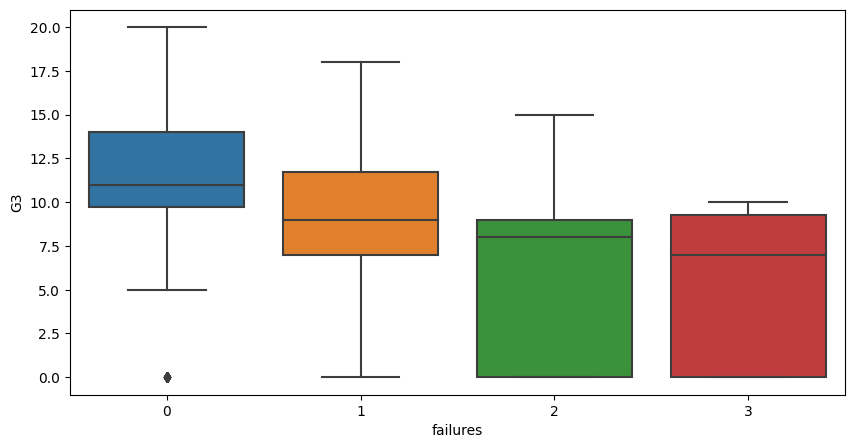

In [16]:
sns.boxplot(x = 'failures', y = 'G3', data=df);
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

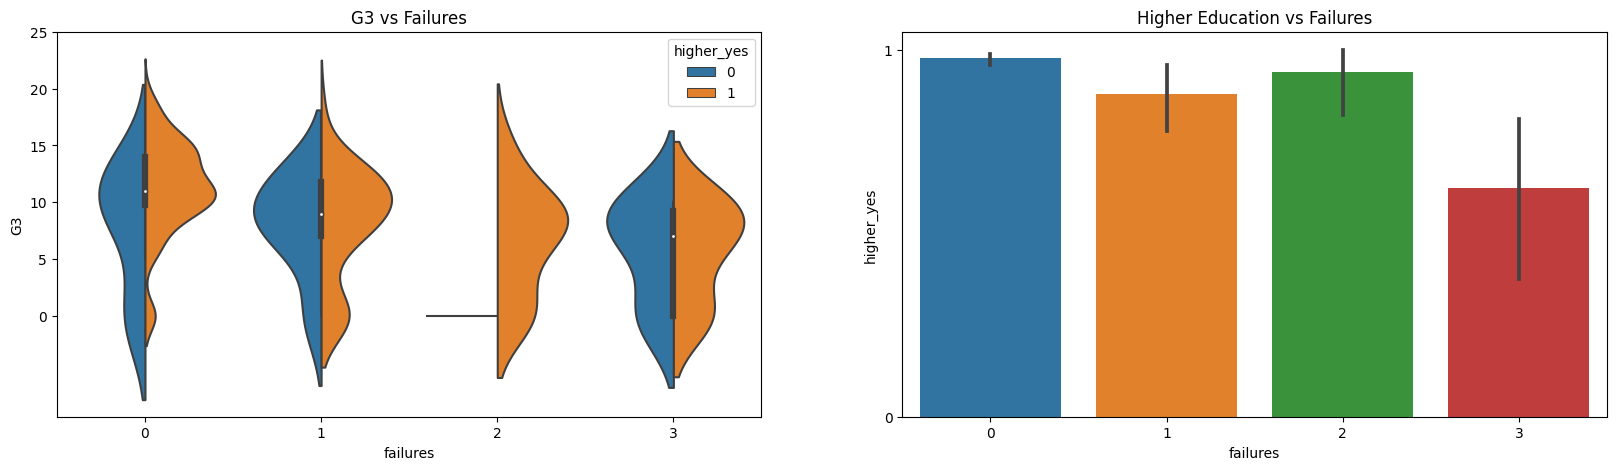

In [17]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.violinplot(x = 'failures', y = 'G3', hue ='higher_yes', split=True, data=df, ax=ax[0])
ax[0].set_title('G3 vs Failures')
ax[0].set_yticks(range(0, 30, 5))
sns.barplot(x = 'failures', y = 'higher_yes', data=df, ax=ax[1])
ax[1].set_title('Higher Education vs Failures')
ax[1].set_yticks(range(0, 2, 1))
plt.show()

* Ученики, не бывавшие на пересдаче, имеют больше вероятность получить высокую оценку
* Ученики, которые не планируют продолжать обучение в ВУЗе, с большей вероятностью завалят предмет

### Качественные признаки Mjob и Guardian

In [18]:
# для более нагядного анализа вернем признаку нормальные значения
df['Mjob'].replace([0, 1, 2, 3, 4], ['other', 'services', 'teacher', 'at_home', 'health'], inplace=True)
df['guardian'].replace( [0, 1, 2], ['other', 'mother', 'father'], inplace=True)

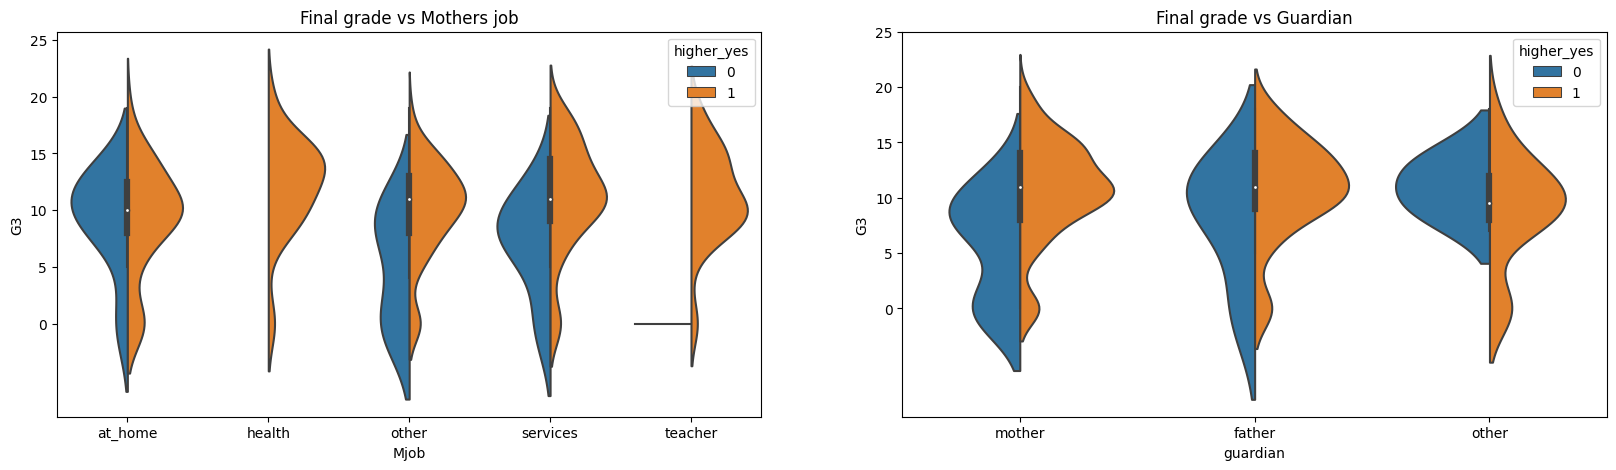

In [19]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.violinplot(x = 'Mjob', y = 'G3', hue ='higher_yes', split=True, data=df, ax=ax[0])
ax[0].set_title('Final grade vs Mothers job')
ax[0].set_yticks(range(0, 30, 5))
sns.violinplot(x = 'guardian', y = 'G3', hue ='higher_yes', split=True, data=df, ax=ax[1])
ax[1].set_title('Final grade vs Guardian')
ax[1].set_yticks(range(0, 30, 5))
plt.show()

Кажется, что у учеников, матери которых работают в сфере здравоохранения и преподавания, во-первых, намного чаще собираются получать высшее образование, чем не собираются, во-вторых, имеют чуть больший шанс сдать предмет на хорошую оценку.
Также, если обратить внимание на график final grade vs guardian, то можно увидеть, что ученики, у которых опекун - мама, в среднем получают более низкие оценки, чем остальные.

In [20]:
df['Mjob'].replace(['other', 'services', 'teacher', 'at_home', 'health'], [0, 1, 2, 3, 4], inplace=True)
df['guardian'].replace(['other', 'mother', 'father'], [0, 1, 2], inplace=True)


### Категориальные признаки higher и schoolsup

In [21]:
pd.crosstab([df['higher_yes'], df['schoolsup_yes']], df['G3']).style.background_gradient()


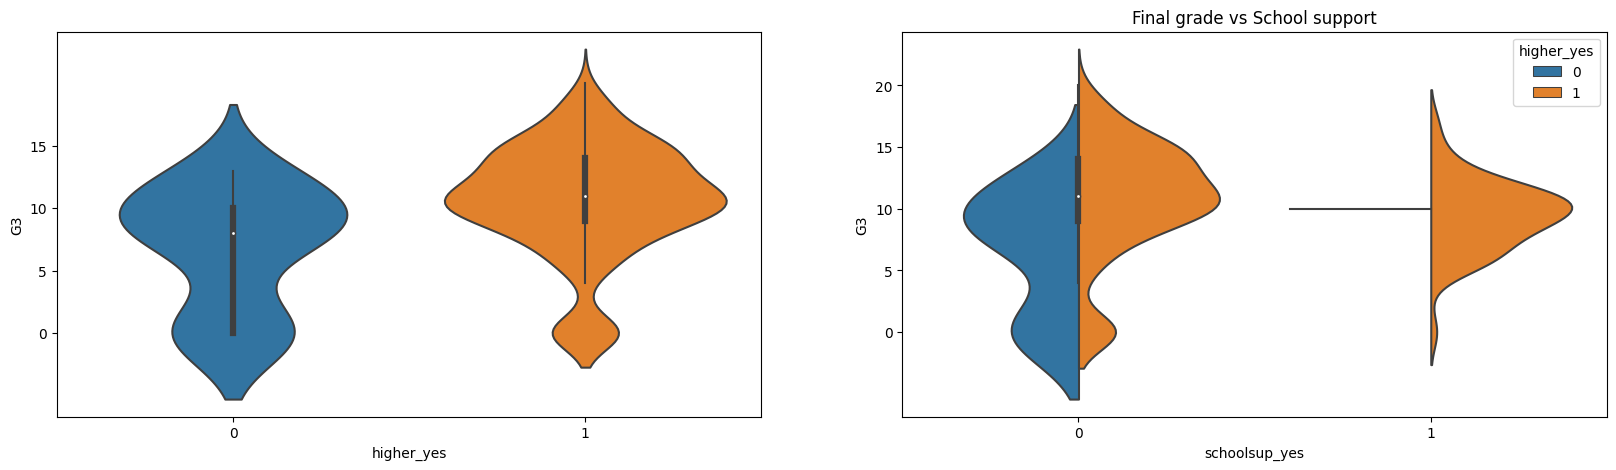

In [22]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.violinplot(x = 'higher_yes', y = 'G3', data=df, ax=ax[0])
ax[0].set_yticks(range(0, 20, 5))
sns.violinplot(x = 'schoolsup_yes', y = 'G3', hue ='higher_yes', split=True, data=df, ax=ax[1])
ax[1].set_title('Final grade vs School support')
ax[1].set_yticks(range(0, 25, 5))
plt.show()

В случае с признаком higher разница между средней оценкой очень заметна: когда студент собирается продолжать обучение в высшем учебном заведении, он с большей вероятностью будет иметь хорошую оценку. При этом, если ученик планирует продолжать обучение в ВУЗе, но нет школьной поддержки при обучении, то вероятность получить хорошую оценку значительно ниже, чем у учеников с поддержкой школы

### Количественный признак G1 (оценка в первом семестре)

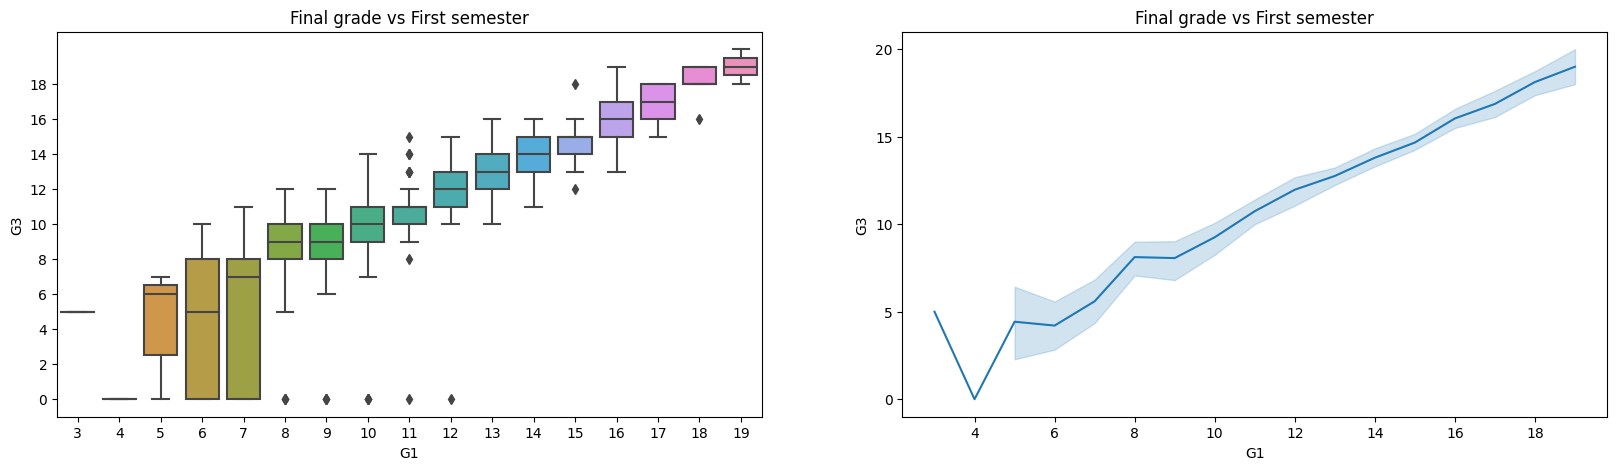

In [23]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x = 'G1', y = 'G3', data=df, ax=ax[0])
ax[0].set_title('Final grade vs First semester')
ax[0].set_yticks(range(0, 20, 2))
sns.lineplot(x = 'G1', y = 'G3', data=df, ax=ax[1])
ax[1].set_title('Final grade vs First semester')
ax[1].set_yticks(range(0, 25, 5))
plt.show()

На обоих графиках прослеживается сильная связь между оценкой за 1 полугодие и итоговой: если у ученика не было проблем с обучением в первом полугодии, то скорее всего не будет проблем и с получением хорошей итоговой оценки. В районе низких оценок можно заметить дочтаточно сильный разброс, так что для оценок меньше 8 баллов, зависимость не так характерно выражена.

### Выводы

* **failures**: оценка у тех, кто не был на пересдаче, выше
* **G1**: для оценок выше 8, итоговая оценка будет +- такая же, как и в первом полугодии
* **Mjob**: у матерей из здравоохранения и преподавания больше детей, которые хотят продолжить обучение в вузе
* **Guardian**: у учеников с опекуном-матерью средняя оценка будет ниже
* **higher**: если ученик планирует поступать в университет, то его оценки выше
* **schoolsup**: если школа предоставляет поддержку при обучении, то большее количество учеников хочет пойти получать высшее образование


## **Построение модели**

In [36]:
from copy import deepcopy
import warnings

class MyLinReg:

    def __init__(self, learning_rate=1e-5, l2_coefficient=1, epochs=25, batch_size=30, random_seed=59):
        self.__weights = []
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.l2_coefficient = l2_coefficient
        self.epochs = epochs
        self.random_seed = random_seed

    # gradient descent
    def fit(self, X_in, y_in):
        warnings.filterwarnings('ignore')
        samples_full, features = np.shape(X_in)

        X = deepcopy(np.hstack((np.ones((samples_full, 1)), X_in)))  # add constant coefficient
        features += 1

        X_full = deepcopy(X)
        y_full = deepcopy(y_in)

        losses = []
        np.random.seed(self.random_seed)
        weights = np.random.random_sample((features,))
        y_predicted_full = []

        for epoch in range(self.epochs):
            order = np.arange(samples_full)
            np.random.shuffle(order)
            X_full = X_full[order]
            y_full = y_full.iloc[order]
            
            parts = samples_full // self.batch_size
            if parts == 0:
                parts = 1
            X_parts = np.array_split(X_full, parts)
            y_parts = np.array_split(y_full, parts)
            for i in range(len(X_parts)):
                X = X_parts[i]
                y = y_parts[i]

                samples = np.shape(X)[0]
                y_current = X @ weights
                error = y_current - y

                l2_term = self.l2_coefficient * np.sum(np.square(weights)) / (2 * samples)

                loss = (np.sum(np.square(error)) + l2_term) / (2 * samples)

                gradient = (X.T @ error + (self.l2_coefficient * weights)) / samples
                weights = weights - (self.learning_rate * gradient)

            y_current_full = X_full @ weights
            error_full = y_current_full - y_full

            l2_term_full = self.l2_coefficient * np.sum(np.square(weights)) / (2 * samples_full)

            loss_full = (np.sum(np.square(error_full)) + l2_term) / (2 * samples)
            # print(f"Loss: {loss_full}, logloss: {np.log10(loss_full)}")
            # print(f"Loss: {loss}, weights: {weights}, gradient: {gradient}, l2: {l2_term}, error: {error}\n")

        self.__weights = weights
        return self

    def predict(self, X):
        w = self.__weights

        samples_full, features = np.shape(X)

        X = np.hstack((np.ones((samples_full, 1)), X))  # add constant coefficient
        features += 1

        X_full = X

        y_predicted_full = X_full @ w.T
        
        return y_predicted_full

    def get_params(self, deep=False):
        return {
            "learning_rate": self.learning_rate,
            "batch_size": self.batch_size,
            "l2_coefficient": self.l2_coefficient,
            "epochs": self.epochs,
            "random_seed": self.random_seed,
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

Делим данные на тестовую и обучающую выборки + масштабируем

In [25]:
y = df["G3"]
X = df.drop(columns = "G3")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)


In [26]:
scaler = StandardScaler()  

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.transform(X)

### Подбор оптимальных гиперпараметров

В процессе тестирования GridSearchCV некоторые значения гиперпараметров были откинуты, здесь приведены лишь некоторые, для ускорения обучения.

In [37]:
lrate = [0.001, 0.0001, 0.00001, 0.000001]
l2 = [0.0001, 0.001, 0.01]
epo = [50, 200, 500, 2000]
batch_mb = [30]
batch_1 = [1]
batch_all = [len(y_train)]
mlr = MyLinReg()

In [39]:
# minibatch

grid_search_mb = GridSearchCV(estimator=mlr, scoring='r2', error_score='raise',
        param_grid=dict(learning_rate=lrate, l2_coefficient=l2, epochs=epo, batch_size=batch_mb), n_jobs=-1)
grid_search_mb.fit(X_train_scaled, y_train)

print("\nbest score MBGD: ", grid_search_mb.best_score_)
print("best param MBGD: ", grid_search_mb.best_params_)
print("test score MBGD:", grid_search_mb.score(X_test_scaled, y_test))

# best score MBGD:  0.6120672424571559
# best param MBGD:  {'batch_size': 30, 'epochs': 2000, 'l2_coefficient': 0.01, 'learning_rate': 0.001}
# test score MBGD: 0.6633592324630994


best score MBGD:  0.6120672424571559
best param MBGD:  {'batch_size': 30, 'epochs': 2000, 'l2_coefficient': 0.01, 'learning_rate': 0.001}
test score MBGD: 0.6633592324630994


In [49]:
# batch

grid_search_b = GridSearchCV(estimator=mlr, scoring='r2', error_score='raise',
        param_grid=dict(learning_rate=lrate, l2_coefficient=l2, epochs=epo, batch_size=batch_all), n_jobs=-1)
grid_search_b.fit(X_train_scaled, y_train)

print("best score BGD: ", grid_search_b.best_score_)
print("best param BGD: ", grid_search_b.best_params_)
print("test score BGD:", grid_search_b.score(X_test_scaled, y_test))

# best score BGD:  0.49018497187352283
# best param BGD:  {'batch_size': 296, 'epochs': 2000, 'l2_coefficient': 0.0001, 'learning_rate': 0.001}
# test score BGD: 0.6134095525800114

best score BGD:  0.49018497187352283
best param BGD:  {'batch_size': 296, 'epochs': 2000, 'l2_coefficient': 0.0001, 'learning_rate': 0.001}
test score BGD: 0.6134095525800114


In [41]:
# stohastic

grid_search1 = GridSearchCV(estimator=mlr, scoring='r2', error_score='raise',
        param_grid=dict(learning_rate=lrate, l2_coefficient=l2, epochs=epo, batch_size=batch_1), n_jobs=-1)
grid_search1.fit(X_train_scaled, y_train)
print("\nbest score SGD: ", grid_search1.best_score_)
print("best param SGD: ", grid_search1.best_params_)
print("test score MBGD:", grid_search1.score(X_test_scaled, y_test))

# best score SGD:  0.6124207604304978
# best param SGD:  {'batch_size': 1, 'epochs': 200, 'l2_coefficient': 0.0001, 'learning_rate': 0.001}
# test score MBGD: 0.6639985437091619


best score SGD:  0.6124207604304978
best param SGD:  {'batch_size': 1, 'epochs': 200, 'l2_coefficient': 0.0001, 'learning_rate': 0.001}
test score MBGD: 0.6639985437091619


### Обучение нашей модели

In [44]:
# Gradient Descent

model_gd = MyLinReg(learning_rate=0.001, l2_coefficient=0.0001, epochs=2000, batch_size=len(y_train))
model_gd.fit(X_train_scaled, y_train)
y_train_pred_gd_1 = model_gd.predict(X_train_scaled)
y_test_pred_gd_1 = model_gd.predict(X_test_scaled)

mse_test_gd_1 = mean_squared_error(y_test, y_test_pred_gd_1)
mse_train_gd_1 = mean_squared_error(y_train, y_train_pred_gd_1)
rmse_test_gd_1 =  mean_squared_error(y_test, y_test_pred_gd_1, squared=False)
rmse_train_gd_1 =  mean_squared_error(y_train, y_train_pred_gd_1, squared=False)
r2_test_gd_1 = r2_score(y_test, y_test_pred_gd_1)
r2_train_gd_1 =  r2_score(y_train, y_train_pred_gd_1)

print("MSE score, GD train and test: ", mse_train_gd_1, mse_test_gd_1)
print("RMSE score, GD train and test: ", rmse_train_gd_1,rmse_test_gd_1)
print("R2 score, GD train and test: ", r2_train_gd_1, r2_test_gd_1)

MSE score, GD train and test:  8.487396555277343 10.943653347187121
RMSE score, GD train and test:  2.91331367265479 3.308119306673676
R2 score, GD train and test:  0.5391791116332605 0.6134095525800114


In [45]:
# Stochastic Gradient Descent, SGD

model_sgd = MyLinReg(learning_rate=0.001, l2_coefficient=0.0001, epochs=200, batch_size=1)
model_sgd.fit(X_train_scaled, y_train)
y_train_pred_sgd_1 = model_sgd.predict(X_train_scaled)
y_test_pred_sgd_1 = model_sgd.predict(X_test_scaled)

mse_test_sgd_1 = mean_squared_error(y_test, y_test_pred_sgd_1)
mse_train_sgd_1 = mean_squared_error(y_train, y_train_pred_sgd_1)
rmse_test_sgd_1 =  mean_squared_error(y_test, y_test_pred_sgd_1, squared=False)
rmse_train_sgd_1 =  mean_squared_error(y_train, y_train_pred_sgd_1, squared=False)
r2_test_sgd_1 = r2_score(y_test, y_test_pred_sgd_1)
r2_train_sgd_1 =  r2_score(y_train, y_train_pred_sgd_1)

print("MSE score, SGD train and test: ", mse_train_sgd_1, mse_test_sgd_1)
print("RMSE score, SGD train and test: ", rmse_train_sgd_1,rmse_test_sgd_1)
print("R2 score, SGD train and test: ", r2_train_sgd_1, r2_test_sgd_1)

MSE score, SGD train and test:  6.522925044911899 9.51157351749622
RMSE score, SGD train and test:  2.5540017707339002 3.0840839024735076
R2 score, SGD train and test:  0.6458395581767733 0.6639985437091619


In [46]:
# Mini-Batch Gradient Descent

model_mbgd = MyLinReg(learning_rate= 0.001, l2_coefficient=0.01, epochs=2000, batch_size=30)
model_mbgd.fit(X_train_scaled, y_train)
y_train_pred_mbgd_1 = model_mbgd.predict(X_train_scaled)
y_test_pred_mbgd_1 = model_mbgd.predict(X_test_scaled)

mse_test_mbgd_1 = mean_squared_error(y_test, y_test_pred_mbgd_1)
mse_train_mbgd_1 = mean_squared_error(y_train, y_train_pred_mbgd_1)
rmse_test_mbgd_1 =  mean_squared_error(y_test, y_test_pred_mbgd_1, squared=False)
rmse_train_mbgd_1 =  mean_squared_error(y_train, y_train_pred_mbgd_1, squared=False)
r2_test_mbgd_1 = r2_score(y_test, y_test_pred_mbgd_1)
r2_train_mbgd_1 =  r2_score(y_train, y_train_pred_mbgd_1)

print("MSE score, MBGD train and test: ", mse_train_mbgd_1, mse_test_mbgd_1)
print("RMSE score, MBGD train and test: ", rmse_train_mbgd_1,rmse_test_mbgd_1)
print("R2 score, MBGD train and test: ", r2_train_mbgd_1, r2_test_mbgd_1)

MSE score, MBGD train and test:  6.522683601288677 9.529671224525865
RMSE score, MBGD train and test:  2.5539545025878354 3.0870165572160224
R2 score, MBGD train and test:  0.645852667292651 0.6633592324630994


### Обучение Ridge

In [53]:
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
y_test_pred_ridge_1 = model_ridge.predict(X_test_scaled)
y_train_pred_ridge_1 = model_ridge.predict(X_train_scaled)

mse_test_ridge_1 = mean_squared_error(y_test, y_test_pred_ridge_1)
mse_train_ridge_1 = mean_squared_error(y_train, y_train_pred_ridge_1)
rmse_test_ridge_1 =  mean_squared_error(y_test, y_test_pred_ridge_1, squared=False)
rmse_train_ridge_1 =  mean_squared_error(y_train, y_train_pred_ridge_1, squared=False)
r2_test_ridge_1 = r2_score(y_test, y_test_pred_ridge_1)
r2_train_ridge_1 =  r2_score(y_train, y_train_pred_ridge_1)

print("MSE score, Ridge train and test: ", mse_train_ridge_1, mse_test_ridge_1)
print("RMSE score, Ridge train and test: ", rmse_train_ridge_1,rmse_test_ridge_1)
print("R2 score, Ridge train and test: ", r2_train_ridge_1, r2_test_ridge_1)

MSE score, Ridge train and test:  6.522831591182694 9.550357236782645
RMSE score, Ridge train and test:  2.5539834751193466 3.090365227086055
R2 score, Ridge train and test:  0.6458446322215918 0.6626284879411396


### Выводы по гиперпараметрам и обучению

Для сравнения мы дополнительно обучили модель linear_model.Ridge из sklearn на тех же данных.

Как мы видим по error scores, Ridge с гиперпараметрами по умолчанию, SGD и Mini-batch с оптимальными г/п очень близки друг к другу в точности, в то время как batch GD даёт предсказания хуже как на тренировочной выборке, так и на тестовой. 

Такая разница может быть объяснена тем, что в выборке гиперпараметров для grid_search не оказалось оптимальных значений для BGD. Проверим эту гипотезу, расширив список значений:

In [59]:
lrate = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
l2 = [0.0001, 0.001, 0.01, 0.1, 1]
epo = [200, 500, 2000, 5000, 10000]

grid_search_b = GridSearchCV(estimator=mlr, scoring='r2', error_score='raise',
        param_grid=dict(learning_rate=lrate, l2_coefficient=l2, epochs=epo, batch_size=batch_all), n_jobs=-1)
grid_search_b.fit(X_train_scaled, y_train)

print("best score BGD: ", grid_search_b.best_score_)
print("best param BGD: ", grid_search_b.best_params_)
print("test score BGD:", grid_search_b.score(X_test_scaled, y_test))

best score BGD:  0.6122608758838111
best param BGD:  {'batch_size': 296, 'epochs': 500, 'l2_coefficient': 0.0001, 'learning_rate': 0.01}
test score BGD: 0.6623944004701495


Теория подтвердилась, при увеличении `learning_rate` модель стала обучаться за меньшее количество эпох, но при этом делать это лучше, и теперь результаты сопоставимы с тремя другими алгоритмами.

Обучиим модель заново с обновленными параметрами и будем использовать этот результат для дальнейшей кросс-валидации:

In [62]:
# Batch Gradient Descent

model_gd = MyLinReg(learning_rate=0.01, l2_coefficient=0.0001, epochs=500, batch_size=len(y_train))
model_gd.fit(X_train_scaled, y_train)
y_train_pred_gd_1 = model_gd.predict(X_train_scaled)
y_test_pred_gd_1 = model_gd.predict(X_test_scaled)

mse_test_gd_1 = mean_squared_error(y_test, y_test_pred_gd_1)
mse_train_gd_1 = mean_squared_error(y_train, y_train_pred_gd_1)
rmse_test_gd_1 =  mean_squared_error(y_test, y_test_pred_gd_1, squared=False)
rmse_train_gd_1 =  mean_squared_error(y_train, y_train_pred_gd_1, squared=False)
r2_test_gd_1 = r2_score(y_test, y_test_pred_gd_1)
r2_train_gd_1 =  r2_score(y_train, y_train_pred_gd_1)

print("MSE score, GD train and test: ", mse_train_gd_1, mse_test_gd_1)
print("RMSE score, GD train and test: ", rmse_train_gd_1,rmse_test_gd_1)
print("R2 score, GD train and test: ", r2_train_gd_1, r2_test_gd_1)

MSE score, GD train and test:  6.532582586192984 9.55698381576961
RMSE score, GD train and test:  2.5558917399203325 3.091437176422903
R2 score, GD train and test:  0.6453152045986645 0.6623944004701495


### Кросс-валидация

In [63]:
scores_gd = cross_validate(model_gd, X_scaled, y, cv = 5, n_jobs=-1,
                        scoring = ('r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'),
                        return_train_score = True)
scores_sgd = cross_validate(model_sgd, X_scaled, y, cv = 5, n_jobs=-1,
                        scoring = ('r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'),
                        return_train_score = True)
scores_mbgd = cross_validate(model_mbgd, X_scaled, y, cv = 5, n_jobs=-1,
                        scoring = ('r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'),
                        return_train_score = True)
scores_ridge = cross_validate(model_ridge, X_scaled, y, cv = 5, n_jobs=-1,
                        scoring = ('r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'),
                        return_train_score = True)

## Результаты

In [64]:
print("Batch Gradient Descent")

data_gd = [["mse-train", -scores_gd['train_neg_mean_squared_error'][0], -scores_gd['train_neg_mean_squared_error'][1], -scores_gd['train_neg_mean_squared_error'][2], -scores_gd['train_neg_mean_squared_error'][3], -scores_gd['train_neg_mean_squared_error'][4], -np.mean(scores_gd['train_neg_mean_squared_error']), np.std(scores_gd['train_neg_mean_squared_error']) ], 
        ["mse-test", -scores_gd['test_neg_mean_squared_error'][0], -scores_gd['test_neg_mean_squared_error'][1], -scores_gd['test_neg_mean_squared_error'][2], -scores_gd['test_neg_mean_squared_error'][3], -scores_gd['test_neg_mean_squared_error'][4], -np.mean(scores_gd['test_neg_mean_squared_error']), np.std(scores_gd['test_neg_mean_squared_error'])], 
        ["rmse-train", -scores_gd['train_neg_root_mean_squared_error'][0], -scores_gd['train_neg_root_mean_squared_error'][1], -scores_gd['train_neg_root_mean_squared_error'][2], -scores_gd['train_neg_root_mean_squared_error'][3], -scores_gd['train_neg_root_mean_squared_error'][4], -np.mean(scores_gd['train_neg_root_mean_squared_error']), np.std(scores_gd['train_neg_root_mean_squared_error'])], 
        ["rmse-test", -scores_gd['test_neg_root_mean_squared_error'][0], -scores_gd['test_neg_root_mean_squared_error'][1], -scores_gd['test_neg_root_mean_squared_error'][2], -scores_gd['test_neg_root_mean_squared_error'][3], -scores_gd['test_neg_root_mean_squared_error'][4], -np.mean(scores_gd['test_neg_root_mean_squared_error']), np.std(scores_gd['test_neg_root_mean_squared_error'])], 
        ["r2-train", scores_gd['train_r2'][0], scores_gd['train_r2'][1], scores_gd['train_r2'][2], scores_gd['train_r2'][3], scores_gd['train_r2'][4], np.mean(scores_gd['train_r2']), np.std(scores_gd['train_r2'])], 
        ["r2-test", scores_gd['test_r2'][0], scores_gd['test_r2'][1], scores_gd['test_r2'][2], scores_gd['test_r2'][3], scores_gd['test_r2'][4], np.mean(scores_gd['test_r2']), np.std(scores_gd['test_r2'])]]

col_names_gd = ["Metrics", "Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "E", "STD"]


print(tabulate(data_gd, headers=col_names_gd, tablefmt="fancy_grid"))


Batch Gradient Descent
╒════════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╕
│ Metrics    │    Fold1 │     Fold2 │    Fold3 │    Fold4 │    Fold5 │        E │       STD │
╞════════════╪══════════╪═══════════╪══════════╪══════════╪══════════╪══════════╪═══════════╡
│ mse-train  │ 7.88448  │  6.13994  │ 7.80107  │ 7.06548  │ 6.80137  │ 7.13847  │ 0.649861  │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ mse-test   │ 4.74973  │ 11.4831   │ 4.78203  │ 7.68098  │ 8.92663  │ 7.52449  │ 2.56443   │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-train │ 2.80793  │  2.47789  │ 2.79304  │ 2.6581   │ 2.60794  │ 2.66898  │ 0.122521  │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-test  │ 2.17939  │  3.38867  │ 2.18679  │ 2.77146  │ 2.98775  │ 2.70281  │ 0.468308  │
├────────────┼──────────┼───────────┼

In [65]:
print("Stochastic Gradient Descent, SGD")


data_sgd = [["mse-train", -scores_sgd['train_neg_mean_squared_error'][0], -scores_sgd['train_neg_mean_squared_error'][1], -scores_sgd['train_neg_mean_squared_error'][2], -scores_sgd['train_neg_mean_squared_error'][3], -scores_sgd['train_neg_mean_squared_error'][4], -np.mean(scores_sgd['train_neg_mean_squared_error']), np.std(scores_sgd['train_neg_mean_squared_error']) ], 
        ["mse-test", -scores_sgd['test_neg_mean_squared_error'][0], -scores_sgd['test_neg_mean_squared_error'][1], -scores_sgd['test_neg_mean_squared_error'][2], -scores_sgd['test_neg_mean_squared_error'][3], -scores_sgd['test_neg_mean_squared_error'][4], -np.mean(scores_sgd['test_neg_mean_squared_error']), np.std(scores_sgd['test_neg_mean_squared_error'])], 
        ["rmse-train", -scores_sgd['train_neg_root_mean_squared_error'][0], -scores_sgd['train_neg_root_mean_squared_error'][1], -scores_sgd['train_neg_root_mean_squared_error'][2], -scores_sgd['train_neg_root_mean_squared_error'][3], -scores_sgd['train_neg_root_mean_squared_error'][4], -np.mean(scores_sgd['train_neg_root_mean_squared_error']), np.std(scores_sgd['train_neg_root_mean_squared_error'])], 
        ["rmse-test", -scores_sgd['test_neg_root_mean_squared_error'][0], -scores_sgd['test_neg_root_mean_squared_error'][1], -scores_sgd['test_neg_root_mean_squared_error'][2], -scores_sgd['test_neg_root_mean_squared_error'][3], -scores_sgd['test_neg_root_mean_squared_error'][4], -np.mean(scores_sgd['test_neg_root_mean_squared_error']), np.std(scores_sgd['test_neg_root_mean_squared_error'])], 
        ["r2-train", scores_sgd['train_r2'][0], scores_sgd['train_r2'][1], scores_sgd['train_r2'][2], scores_sgd['train_r2'][3], scores_sgd['train_r2'][4], np.mean(scores_sgd['train_r2']), np.std(scores_sgd['train_r2'])], 
        ["r2-test", scores_sgd['test_r2'][0], scores_sgd['test_r2'][1], scores_sgd['test_r2'][2], scores_sgd['test_r2'][3], scores_sgd['test_r2'][4], np.mean(scores_sgd['test_r2']), np.std(scores_sgd['test_r2'])]]

col_names_sgd = ["Metrics", "Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "E", "STD"]



print(tabulate(data_sgd, headers=col_names_sgd, tablefmt="fancy_grid"))

Stochastic Gradient Descent, SGD
╒════════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╕
│ Metrics    │    Fold1 │     Fold2 │    Fold3 │    Fold4 │    Fold5 │        E │       STD │
╞════════════╪══════════╪═══════════╪══════════╪══════════╪══════════╪══════════╪═══════════╡
│ mse-train  │ 7.86368  │  6.12621  │ 7.79579  │ 7.04369  │ 6.79387  │ 7.12465  │ 0.649531  │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ mse-test   │ 4.72629  │ 11.4663   │ 4.7726   │ 7.85233  │ 8.9689   │ 7.55727  │ 2.57405   │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-train │ 2.80423  │  2.47512  │ 2.7921   │ 2.654    │ 2.6065   │ 2.66639  │ 0.122577  │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-test  │ 2.174    │  3.38619  │ 2.18463  │ 2.8022   │ 2.99481  │ 2.70837  │ 0.471199  │
├────────────┼──────────┼──

In [66]:
print("Mini Batch Gradient Descent")


data_mb = [["mse-train", -scores_mbgd['train_neg_mean_squared_error'][0], -scores_mbgd['train_neg_mean_squared_error'][1], -scores_mbgd['train_neg_mean_squared_error'][2], -scores_mbgd['train_neg_mean_squared_error'][3], -scores_mbgd['train_neg_mean_squared_error'][4], -np.mean(scores_mbgd['train_neg_mean_squared_error']), np.std(scores_mbgd['train_neg_mean_squared_error']) ], 
        ["mse-test", -scores_mbgd['test_neg_mean_squared_error'][0], -scores_mbgd['test_neg_mean_squared_error'][1], -scores_mbgd['test_neg_mean_squared_error'][2], -scores_mbgd['test_neg_mean_squared_error'][3], -scores_mbgd['test_neg_mean_squared_error'][4], -np.mean(scores_mbgd['test_neg_mean_squared_error']), np.std(scores_mbgd['test_neg_mean_squared_error'])], 
        ["rmse-train", -scores_mbgd['train_neg_root_mean_squared_error'][0], -scores_mbgd['train_neg_root_mean_squared_error'][1], -scores_mbgd['train_neg_root_mean_squared_error'][2], -scores_mbgd['train_neg_root_mean_squared_error'][3], -scores_mbgd['train_neg_root_mean_squared_error'][4], -np.mean(scores_mbgd['train_neg_root_mean_squared_error']), np.std(scores_mbgd['train_neg_root_mean_squared_error'])], 
        ["rmse-test", -scores_mbgd['test_neg_root_mean_squared_error'][0], -scores_mbgd['test_neg_root_mean_squared_error'][1], -scores_mbgd['test_neg_root_mean_squared_error'][2], -scores_mbgd['test_neg_root_mean_squared_error'][3], -scores_mbgd['test_neg_root_mean_squared_error'][4], -np.mean(scores_mbgd['test_neg_root_mean_squared_error']), np.std(scores_mbgd['test_neg_root_mean_squared_error'])], 
        ["r2-train", scores_mbgd['train_r2'][0], scores_mbgd['train_r2'][1], scores_mbgd['train_r2'][2], scores_mbgd['train_r2'][3], scores_mbgd['train_r2'][4], np.mean(scores_mbgd['train_r2']), np.std(scores_mbgd['train_r2'])], 
        ["r2-test", scores_mbgd['test_r2'][0], scores_mbgd['test_r2'][1], scores_mbgd['test_r2'][2], scores_mbgd['test_r2'][3], scores_mbgd['test_r2'][4], np.mean(scores_mbgd['test_r2']), np.std(scores_mbgd['test_r2'])]]

col_names_mb = ["Metrics", "Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "E", "STD"]


print(tabulate(data_mb, headers=col_names_mb, tablefmt="fancy_grid"))

Mini Batch Gradient Descent
╒════════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╕
│ Metrics    │    Fold1 │     Fold2 │    Fold3 │    Fold4 │    Fold5 │        E │       STD │
╞════════════╪══════════╪═══════════╪══════════╪══════════╪══════════╪══════════╪═══════════╡
│ mse-train  │ 7.86341  │  6.12621  │ 7.79572  │ 7.04359  │ 6.79356  │ 7.1245   │ 0.649487  │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ mse-test   │ 4.75967  │ 11.4663   │ 4.77832  │ 7.84572  │ 8.96794  │ 7.56359  │ 2.56526   │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-train │ 2.80418  │  2.47512  │ 2.79208  │ 2.65398  │ 2.60645  │ 2.66636  │ 0.122569  │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-test  │ 2.18167  │  3.3862   │ 2.18594  │ 2.80102  │ 2.99465  │ 2.70989  │ 0.469112  │
├────────────┼──────────┼───────

In [67]:
print("Ridge")

data_r = [["mse-train", -scores_ridge['train_neg_mean_squared_error'][0], -scores_ridge['train_neg_mean_squared_error'][1], -scores_ridge['train_neg_mean_squared_error'][2], -scores_ridge['train_neg_mean_squared_error'][3], -scores_ridge['train_neg_mean_squared_error'][4], -np.mean(scores_ridge['train_neg_mean_squared_error']), np.std(scores_ridge['train_neg_mean_squared_error']) ], 
        ["mse-test", -scores_ridge['test_neg_mean_squared_error'][0], -scores_ridge['test_neg_mean_squared_error'][1], -scores_ridge['test_neg_mean_squared_error'][2], -scores_ridge['test_neg_mean_squared_error'][3], -scores_ridge['test_neg_mean_squared_error'][4], -np.mean(scores_ridge['test_neg_mean_squared_error']), np.std(scores_ridge['test_neg_mean_squared_error'])], 
        ["rmse-train", -scores_ridge['train_neg_root_mean_squared_error'][0], -scores_ridge['train_neg_root_mean_squared_error'][1], -scores_ridge['train_neg_root_mean_squared_error'][2], -scores_ridge['train_neg_root_mean_squared_error'][3], -scores_ridge['train_neg_root_mean_squared_error'][4], -np.mean(scores_ridge['train_neg_root_mean_squared_error']), np.std(scores_ridge['train_neg_root_mean_squared_error'])], 
        ["rmse-test", -scores_ridge['test_neg_root_mean_squared_error'][0], -scores_ridge['test_neg_root_mean_squared_error'][1], -scores_ridge['test_neg_root_mean_squared_error'][2], -scores_ridge['test_neg_root_mean_squared_error'][3], -scores_ridge['test_neg_root_mean_squared_error'][4], -np.mean(scores_ridge['test_neg_root_mean_squared_error']), np.std(scores_ridge['test_neg_root_mean_squared_error'])], 
        ["r2-train", scores_ridge['train_r2'][0], scores_ridge['train_r2'][1], scores_ridge['train_r2'][2], scores_ridge['train_r2'][3], scores_ridge['train_r2'][4], np.mean(scores_ridge['train_r2']), np.std(scores_ridge['train_r2'])], 
        ["r2-test", scores_ridge['test_r2'][0], scores_ridge['test_r2'][1], scores_ridge['test_r2'][2], scores_ridge['test_r2'][3], scores_ridge['test_r2'][4], np.mean(scores_ridge['test_r2']), np.std(scores_ridge['test_r2'])]]

col_names_r = ["Metrics", "Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "E", "STD"]



print(tabulate(data_r, headers=col_names_r, tablefmt="fancy_grid"))

Ridge
╒════════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╕
│ Metrics    │    Fold1 │     Fold2 │    Fold3 │    Fold4 │    Fold5 │        E │       STD │
╞════════════╪══════════╪═══════════╪══════════╪══════════╪══════════╪══════════╪═══════════╡
│ mse-train  │ 7.86357  │  6.12634  │ 7.79587  │ 7.04374  │ 6.79369  │ 7.12464  │ 0.649497  │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ mse-test   │ 4.7385   │ 11.4756   │ 4.76574  │ 7.84727  │ 8.98925  │ 7.56328  │ 2.57783   │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-train │ 2.80421  │  2.47515  │ 2.79211  │ 2.654    │ 2.60647  │ 2.66639  │ 0.12257   │
├────────────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┤
│ rmse-test  │ 2.17681  │  3.38757  │ 2.18306  │ 2.8013   │ 2.99821  │ 2.70939  │ 0.471689  │
├────────────┼──────────┼───────────┼──────────┼──────

## Выводы

При сравнении метрик, полученных при кросс-валидации наших алгоритмов и Ridge на одних и тех же данных, мы видим, что ни одна из моделей не опережает другие сколько-нибудь значительно.

Близость значений функций ошибок у тренировочной и тестовой выборок говорит о том, что переобучения моделей не произошло.

Для наглядности сравним полученные RMSE с глупым предсказателем:

In [69]:
mean_pred = y_train.mean()
print("Train RMSE with stupid predictor =", mean_squared_error(y_train, mean_pred * np.ones(y_train.shape),
                                                                  squared=False))
print("Test RMSE with stupid predictor =", mean_squared_error(y_test, mean_pred * np.ones(y_test.shape),
                                                                 squared=False))

Train RMSE with stupid predictor = 4.291619091932676
Test RMSE with stupid predictor = 5.340360885015896


Как видно, наша модель справляется с предсказанием гораздо лучше на выбранных данных. 